## GFS meteo forcing

This is a presentation of the GFS meteo retrieval function

In [1]:
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import numpy as np

In [2]:
%matplotlib notebook

In [2]:
url = 'https://bluehub.jrc.ec.europa.eu/erddap/griddap/NCEP_Global_Best'

In [5]:
url = 'http://nomads.ncep.noaa.gov:9090/dods/gfs_0p25_1hr/gfs20180201/gfs_0p25_1hr_00z'

In [3]:
grid = xr.open_dataset(url)

In [8]:
url = 'https://rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.3/1/TP'
from pydap.cas.urs import setup_session
username = 'george.breyiannis@ec.europa.eu'
password = 'k28-PF6-rvb-tbs'
session = setup_session(username, password)
store = xr.backends.PydapDataStore.open(url, session=session)
grid = xr.open_dataset(store)

In [4]:
grid

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 720, time: 20331)
Coordinates:
  * time       (time) datetime64[ns] 2011-05-06T12:00:00 2011-05-06T15:00:00 ...
  * latitude   (latitude) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 ...
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 ...
Data variables:
    tmpsfc     (time, latitude, longitude) float64 ...
    tmp2m      (time, latitude, longitude) float64 ...
    ugrd10m    (time, latitude, longitude) float64 ...
    vgrd10m    (time, latitude, longitude) float64 ...
    pratesfc   (time, latitude, longitude) float64 ...
    rh2m       (time, latitude, longitude) float64 ...
    prmslmsl   (time, latitude, longitude) float64 ...
    dlwrfsfc   (time, latitude, longitude) float64 ...
    dswrfsfc   (time, latitude, longitude) float64 ...
Attributes:
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:            The Pacific Islands Ocean Observing System (P..

In [5]:
#time range
grid.attrs['time_coverage_start'], grid.attrs['time_coverage_end']

(u'2011-05-06T12:00:00Z', u'2018-05-03T12:00:00Z')

In [7]:
grid.variables.keys()

[u'time',
 u'latitude',
 u'longitude',
 u'tmpsfc',
 u'tmp2m',
 u'ugrd10m',
 u'vgrd10m',
 u'pratesfc',
 u'rh2m',
 u'prmslmsl',
 u'dlwrfsfc',
 u'dswrfsfc']

In [8]:
#define the lat/lon window and time frame of interest
minlon=-5.+360.
maxlon=8.4
minlat=48.
maxlat=58.9
tslice=slice('2017-5-20', '2017-6-6')

In [9]:
grid.longitude

<xarray.DataArray 'longitude' (longitude: 720)>
array([  0. ,   0.5,   1. , ..., 358.5, 359. , 359.5])
Coordinates:
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 ...
Attributes:
    _CoordinateAxisType:  Lon
    actual_range:         [  0.  359.5]
    axis:                 X
    ioos_category:        Location
    long_name:            Longitude
    standard_name:        longitude
    units:                degrees_east

In [10]:
grid.latitude

<xarray.DataArray 'latitude' (latitude: 361)>
array([-90. , -89.5, -89. , ...,  89. ,  89.5,  90. ])
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 ...
Attributes:
    _CoordinateAxisType:  Lat
    actual_range:         [-90.  90.]
    axis:                 Y
    ioos_category:        Location
    long_name:            Latitude
    standard_name:        latitude
    units:                degrees_north

In [11]:
i0=np.abs(grid.longitude.data-minlon).argmin()
i1=np.abs(grid.longitude.data-maxlon).argmin()
i0,i1

(710, 17)

In [12]:
j0=np.abs(grid.latitude.data-minlat).argmin()
j1=np.abs(grid.latitude.data-maxlat).argmin()
j0,j1

(276, 298)

In [13]:
grid.longitude.size

720

In [14]:
sh = (
    grid[['prmslmsl','ugrd10m', u'vgrd10m']]
    .isel(longitude=slice(i0,grid.longitude.size),latitude=slice(j0,j1))
    .sel(time=tslice)
)

In [15]:
sh

<xarray.Dataset>
Dimensions:    (latitude: 22, longitude: 10, time: 144)
Coordinates:
  * latitude   (latitude) float64 48.0 48.5 49.0 49.5 50.0 50.5 51.0 51.5 ...
  * longitude  (longitude) float64 355.0 355.5 356.0 356.5 357.0 357.5 358.0 ...
  * time       (time) datetime64[ns] 2017-05-20 2017-05-20T03:00:00 ...
Data variables:
    prmslmsl   (time, latitude, longitude) float64 ...
    ugrd10m    (time, latitude, longitude) float64 ...
    vgrd10m    (time, latitude, longitude) float64 ...
Attributes:
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:            The Pacific Islands Ocean Observing System (P...
    cdm_data_type:              Grid
    contributor_name:           Jim Potemra
    contributor_role:           distributor
    Conventions:                CF-1.6, ACDD-1.3
    creator_email:              NCEP.List.PMB-Dataflow@noaa.gov
    creator_institution:        NOAA National Centers for Environmental Predi...
    creator_name:     

In [16]:
sh.longitude.values = sh.longitude.values -360.

In [17]:
sh

<xarray.Dataset>
Dimensions:    (latitude: 22, longitude: 10, time: 144)
Coordinates:
  * latitude   (latitude) float64 48.0 48.5 49.0 49.5 50.0 50.5 51.0 51.5 ...
  * longitude  (longitude) float64 -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 -2.0 -1.5 ...
  * time       (time) datetime64[ns] 2017-05-20 2017-05-20T03:00:00 ...
Data variables:
    prmslmsl   (time, latitude, longitude) float64 ...
    ugrd10m    (time, latitude, longitude) float64 ...
    vgrd10m    (time, latitude, longitude) float64 ...
Attributes:
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:            The Pacific Islands Ocean Observing System (P...
    cdm_data_type:              Grid
    contributor_name:           Jim Potemra
    contributor_role:           distributor
    Conventions:                CF-1.6, ACDD-1.3
    creator_email:              NCEP.List.PMB-Dataflow@noaa.gov
    creator_institution:        NOAA National Centers for Environmental Predi...
    creator_name:       

In [18]:
sh1 = (
    grid[['prmslmsl','ugrd10m', u'vgrd10m']]
    .isel(longitude=slice(0,i1),latitude=slice(j0,j1))
    .sel(time=tslice)
)

In [19]:
sh1

<xarray.Dataset>
Dimensions:    (latitude: 22, longitude: 17, time: 144)
Coordinates:
  * latitude   (latitude) float64 48.0 48.5 49.0 49.5 50.0 50.5 51.0 51.5 ...
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 ...
  * time       (time) datetime64[ns] 2017-05-20 2017-05-20T03:00:00 ...
Data variables:
    prmslmsl   (time, latitude, longitude) float64 ...
    ugrd10m    (time, latitude, longitude) float64 ...
    vgrd10m    (time, latitude, longitude) float64 ...
Attributes:
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:            The Pacific Islands Ocean Observing System (P...
    cdm_data_type:              Grid
    contributor_name:           Jim Potemra
    contributor_role:           distributor
    Conventions:                CF-1.6, ACDD-1.3
    creator_email:              NCEP.List.PMB-Dataflow@noaa.gov
    creator_institution:        NOAA National Centers for Environmental Predi...
    creator_name:       

In [ ]:
tot = xr.concat([sh,sh1],dim='longitude')

<IPython.core.display.Javascript object>


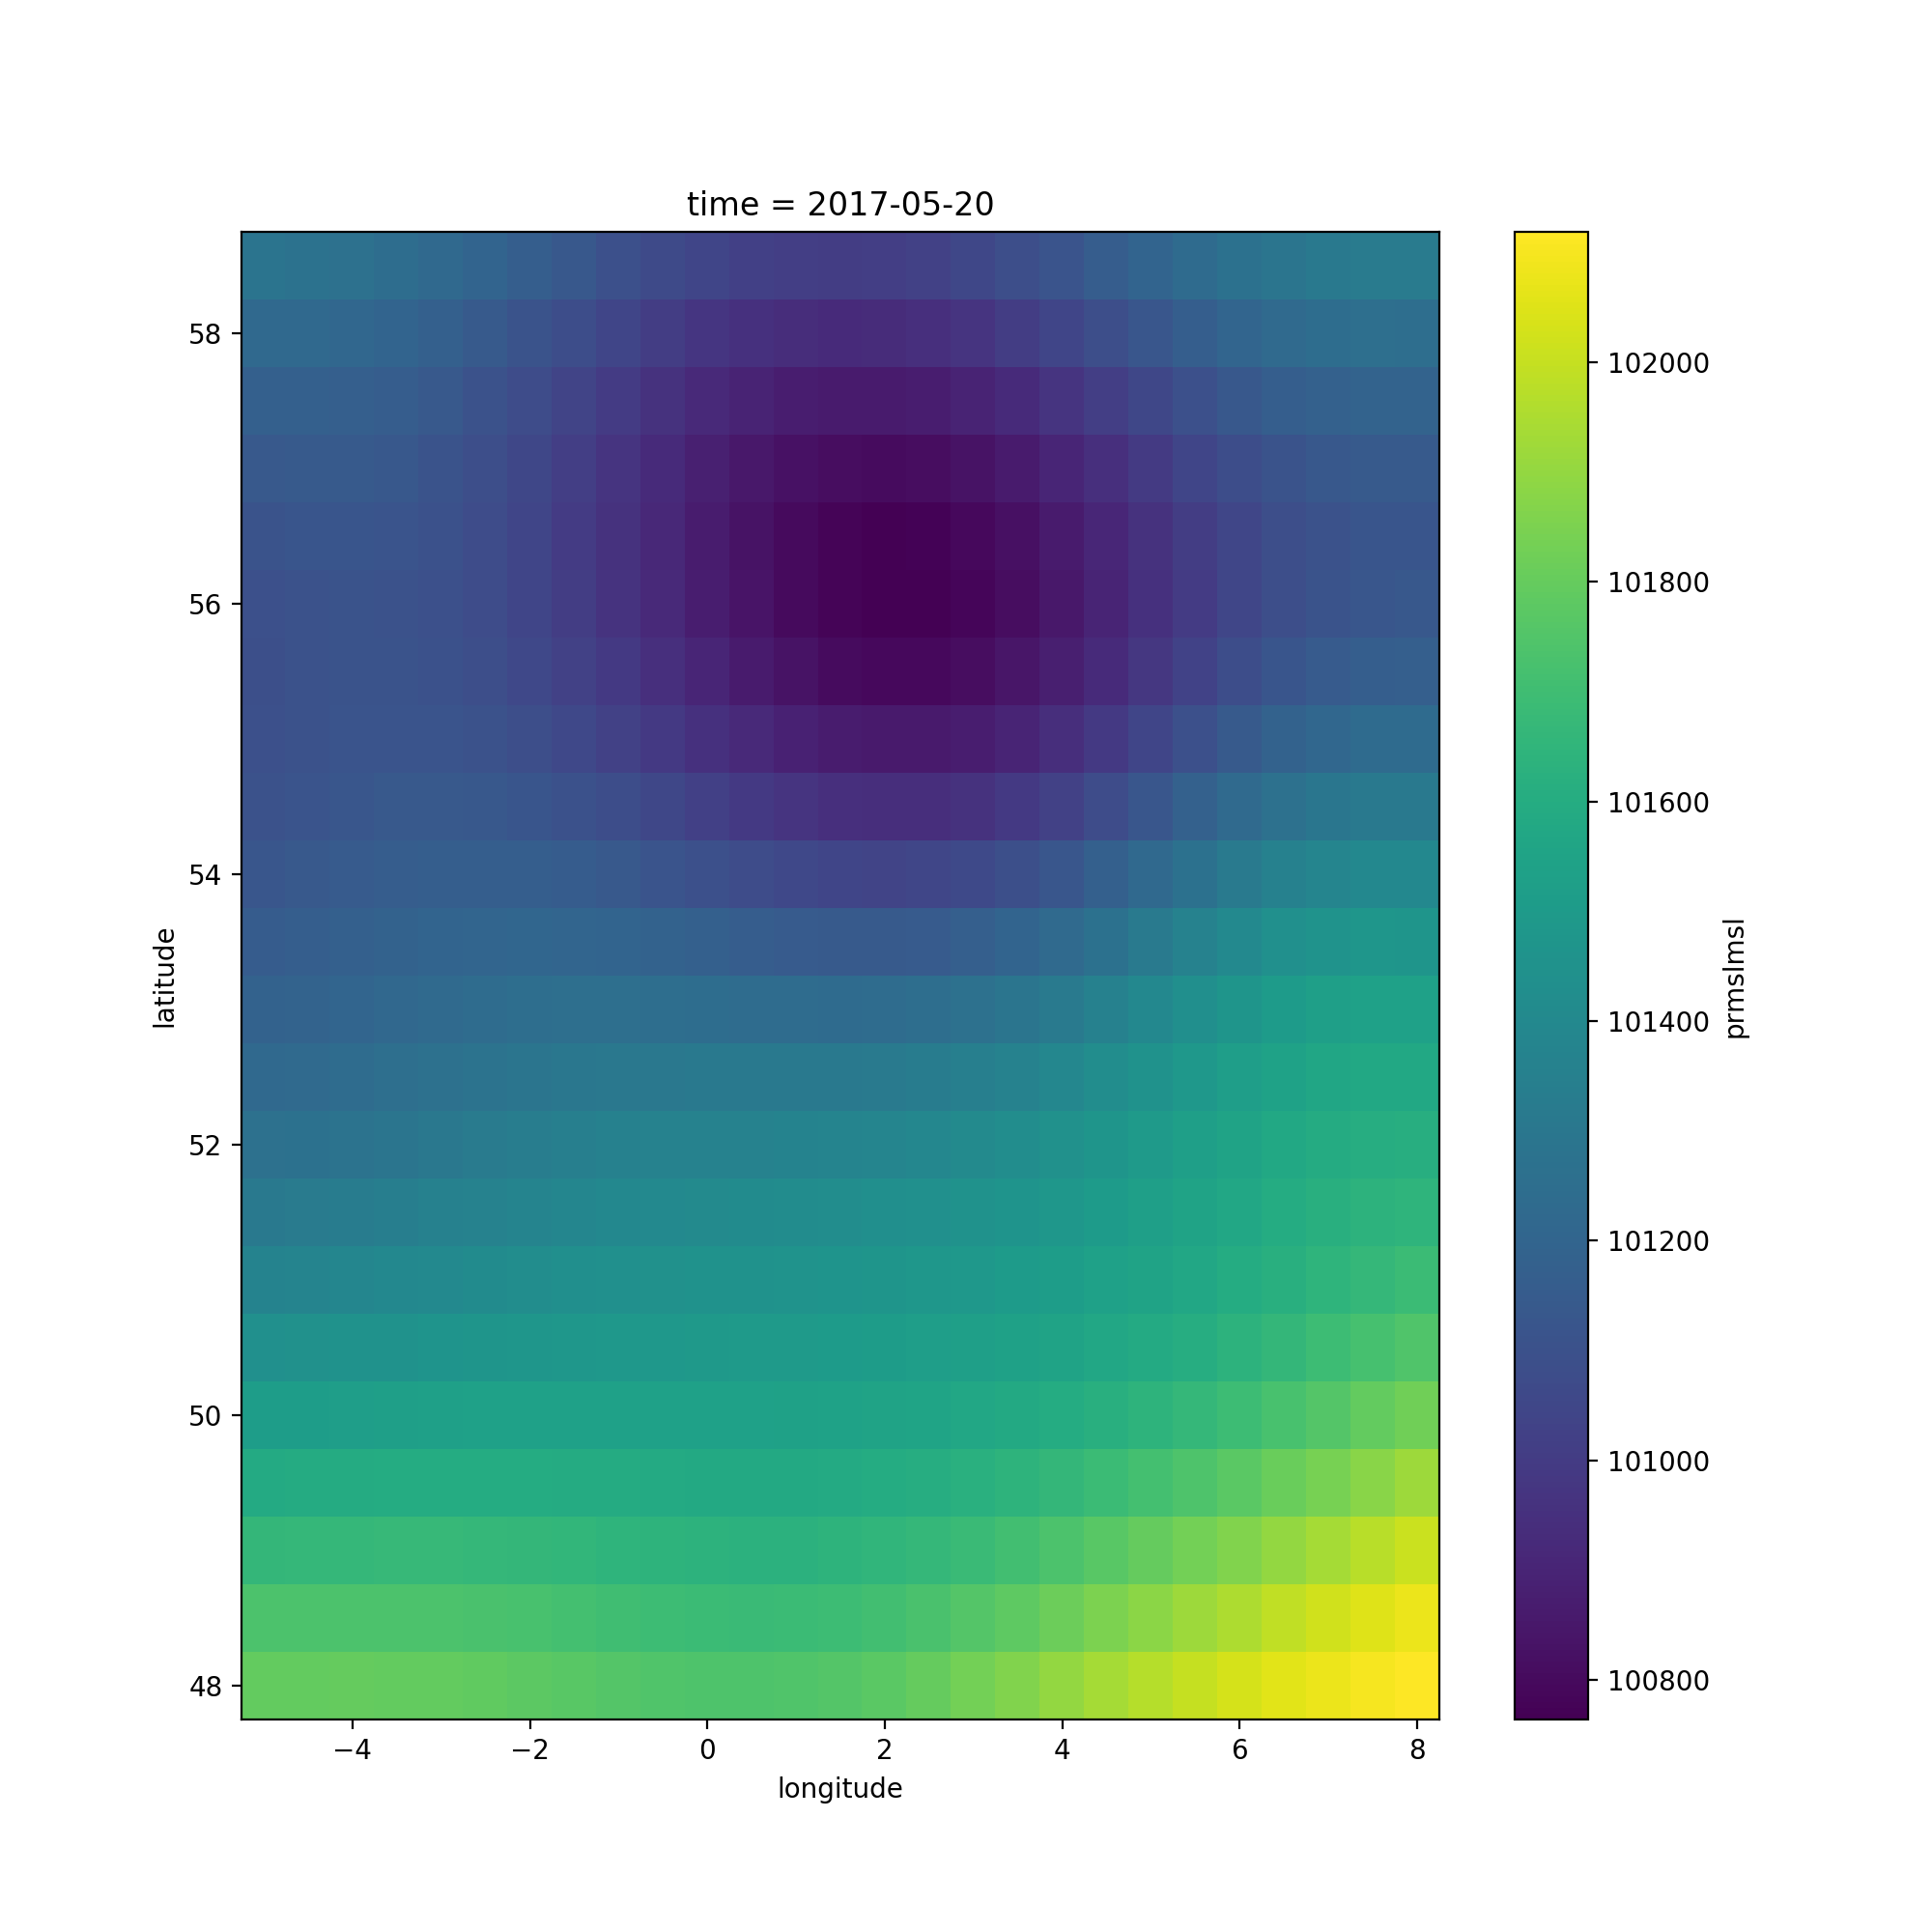

<IPython.core.display.Javascript object>


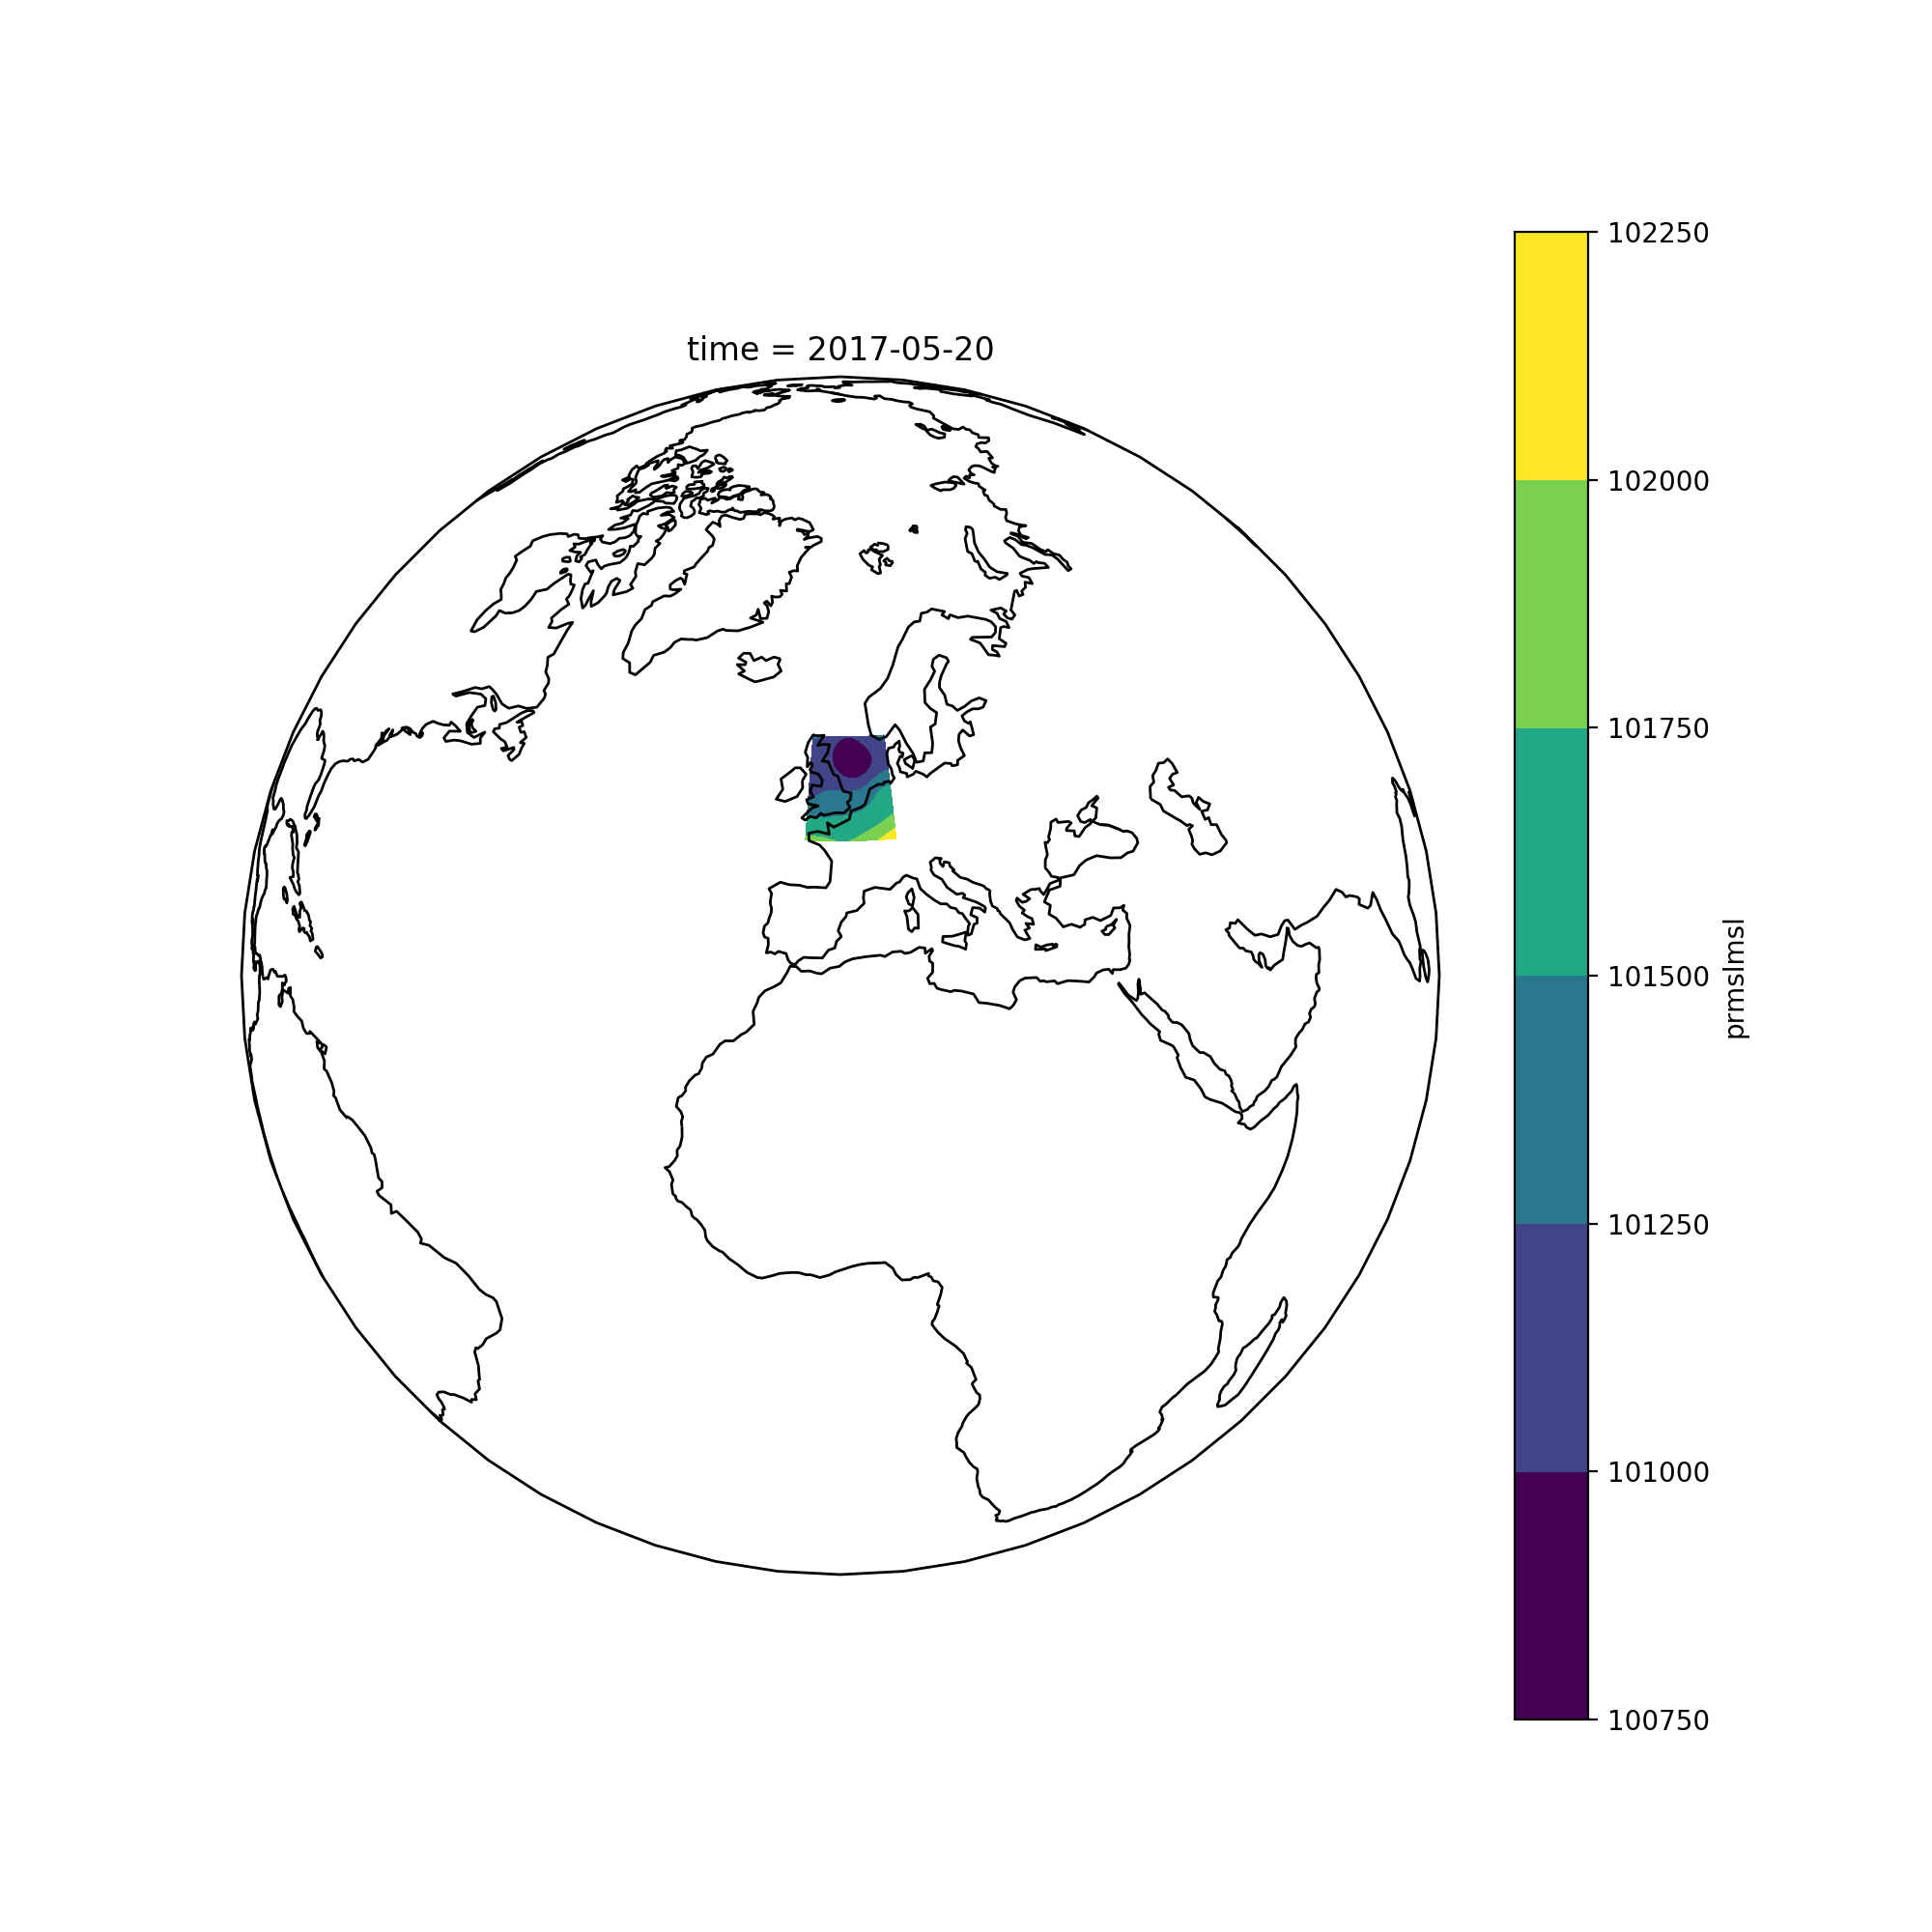

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Orthographic(0, 35))

tot.prmslmsl[0,:,:].plot.contourf(ax=ax, transform=ccrs.PlateCarree());

ax.set_global(); ax.coastlines();

In [ ]:
tot.to_netcdf('/Users/brey/Downloads/test.nc')

In [25]:
xr.open_dataset('/Users/brey/Downloads/test.nc')

<xarray.Dataset>
Dimensions:    (latitude: 22, longitude: 27, time: 144)
Coordinates:
  * latitude   (latitude) float64 48.0 48.5 49.0 49.5 50.0 50.5 51.0 51.5 ...
  * time       (time) datetime64[ns] 2017-05-20 2017-05-20T03:00:00 ...
  * longitude  (longitude) float64 -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 -2.0 -1.5 ...
Data variables:
    prmslmsl   (time, latitude, longitude) float64 ...
    ugrd10m    (time, latitude, longitude) float64 ...
    vgrd10m    (time, latitude, longitude) float64 ...
Attributes:
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:            The Pacific Islands Ocean Observing System (P...
    cdm_data_type:              Grid
    contributor_name:           Jim Potemra
    contributor_role:           distributor
    Conventions:                CF-1.6, ACDD-1.3
    creator_email:              NCEP.List.PMB-Dataflow@noaa.gov
    creator_institution:        NOAA National Centers for Environmental Predi...
    creator_name:       